This script compares IMERG data with CHIRPS

In [39]:
from __future__ import division
import pandas as pd
import numpy as np
from Shrad_modules import read_nc_files, MAKEDIR
import calendar
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import time
import geopandas as gpd
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr

In [53]:
ADMIN_shp = gpd.read_file('/home/chc-shrad/DATA/Extended_outlook/Yield_data/Afghanistan_admin1.shp') # Brian barker
ADMIN_shp = ADMIN_shp.replace('Hirat', 'Herat')
PLOTDIR = '/home/chc-shrad/DATA/Extended_outlook/Plots/Manuscript/Supplementary'

In [3]:
# IMERG Directories and infile template
IMERG_INFILE = '/home/chc-shrad/DATA/Precipitation_Global/IMERG/ClimateSERV/Afghanistan/IMERG_late_20*'
CHIRPS_INFILE = '/home/chc-data-out/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.20*'

In [4]:
IMERG = xr.open_mfdataset(IMERG_INFILE, concat_dim='time', combine='nested')
SEL_IMERG = IMERG.sel(time=slice('2001-01-01', '2023-01-31'))
LAT_MIN, LAT_MAX, LON_MIN, LON_MAX = float(IMERG.latitude.min().values), float(IMERG.latitude.max().values), float(IMERG.longitude.min().values), float(IMERG.longitude.max().values)

In [5]:
CHIRPS = xr.open_mfdataset(CHIRPS_INFILE, concat_dim='time', combine='nested')
SEL_CHIRPS = CHIRPS.sel(latitude=slice(LAT_MIN, LAT_MAX), longitude=slice(LON_MIN, LON_MAX), time=slice('2001-01-01', '2023-01-31'))

In [6]:
CHIRPS_MEAN = SEL_CHIRPS.groupby('time.season').mean(dim='time')
IMERG_MEAN = SEL_IMERG.groupby('time.season').mean(dim='time')

/home/chc-shrad/DATA/Extended_outlook/Plots/Manuscript/Supplementary/plot_CHIRPS_seasonal_mean.png


<Figure size 2000x1406.45 with 0 Axes>

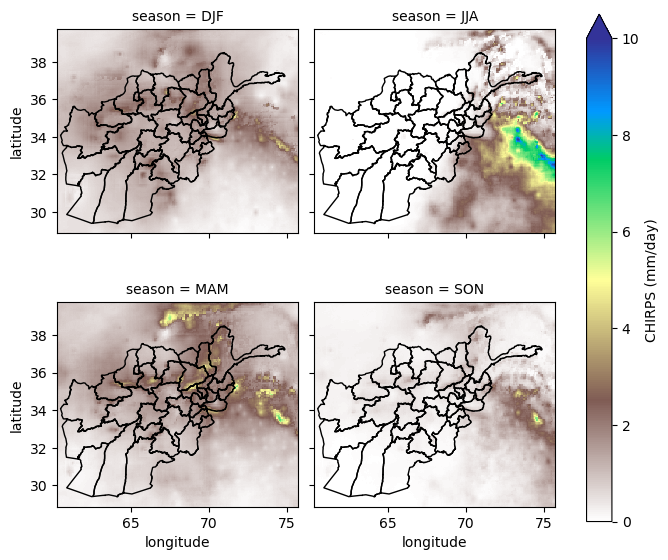

In [57]:
nrows, ncols = 2, 2
figwidth = 20; height = nrows * (LAT_MAX - LAT_MIN); width = ncols * (LON_MAX - LON_MIN)
figheight = (figwidth/width)*height

fig = plt.figure(figsize=(figwidth, figheight))
g = CHIRPS_MEAN['precip'].plot(col="season", col_wrap=2, vmin=0, vmax=10, cmap='terrain_r', cbar_kwargs={"label": "CHIRPS (mm/day)"})
for i, ax in enumerate(g.axes.flat):
    ADMIN_shp.boundary.plot(ax=ax, color='k', lw=1)

Figure = '{}/plot_CHIRPS_seasonal_mean.png'.format(PLOTDIR)
print (Figure)
plt.savefig(Figure, dpi=150, format='png', bbox_inches='tight')

/home/chc-shrad/DATA/Extended_outlook/Plots/Manuscript/Supplementary/plot_IMERG_seasonal_mean.png


<Figure size 2000x2000 with 0 Axes>

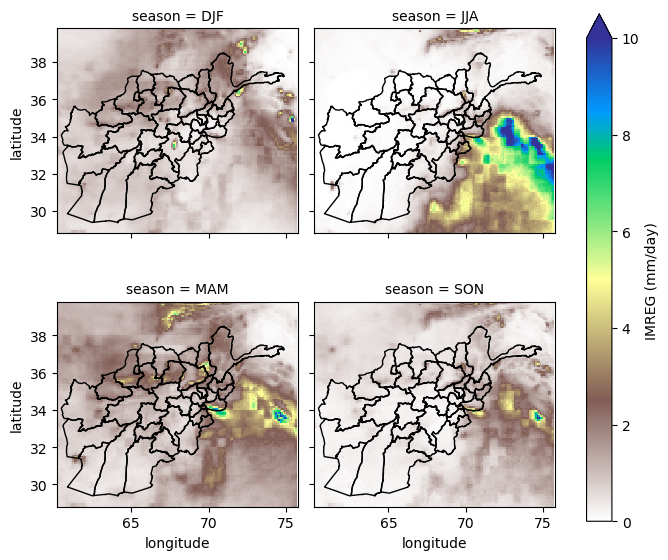

In [56]:
nrows, ncols = 2, 2
figwidth = 20; height = nrows * (LAT_MAX - LAT_MIN); width = ncols * (LON_MAX - LON_MIN)
figheight = 20

fig = plt.figure(figsize=(figwidth, figheight))
g = IMERG_MEAN['precipitation_amount'].plot(col="season", col_wrap=2, vmin=0, vmax=10, cmap='terrain_r', cbar_kwargs={"label": "IMREG (mm/day)"})
for i, ax in enumerate(g.axes.flat):
    ADMIN_shp.boundary.plot(ax=ax, color='k', lw=1)
    
Figure = '{}/plot_IMERG_seasonal_mean.png'.format(PLOTDIR)
print (Figure)
plt.savefig(Figure, dpi=150, format='png', bbox_inches='tight')

/home/chc-shrad/DATA/Extended_outlook/Plots/Manuscript/Supplementary/plot_IMERG_vs_CHIRPS_Winter_season_22-23.png


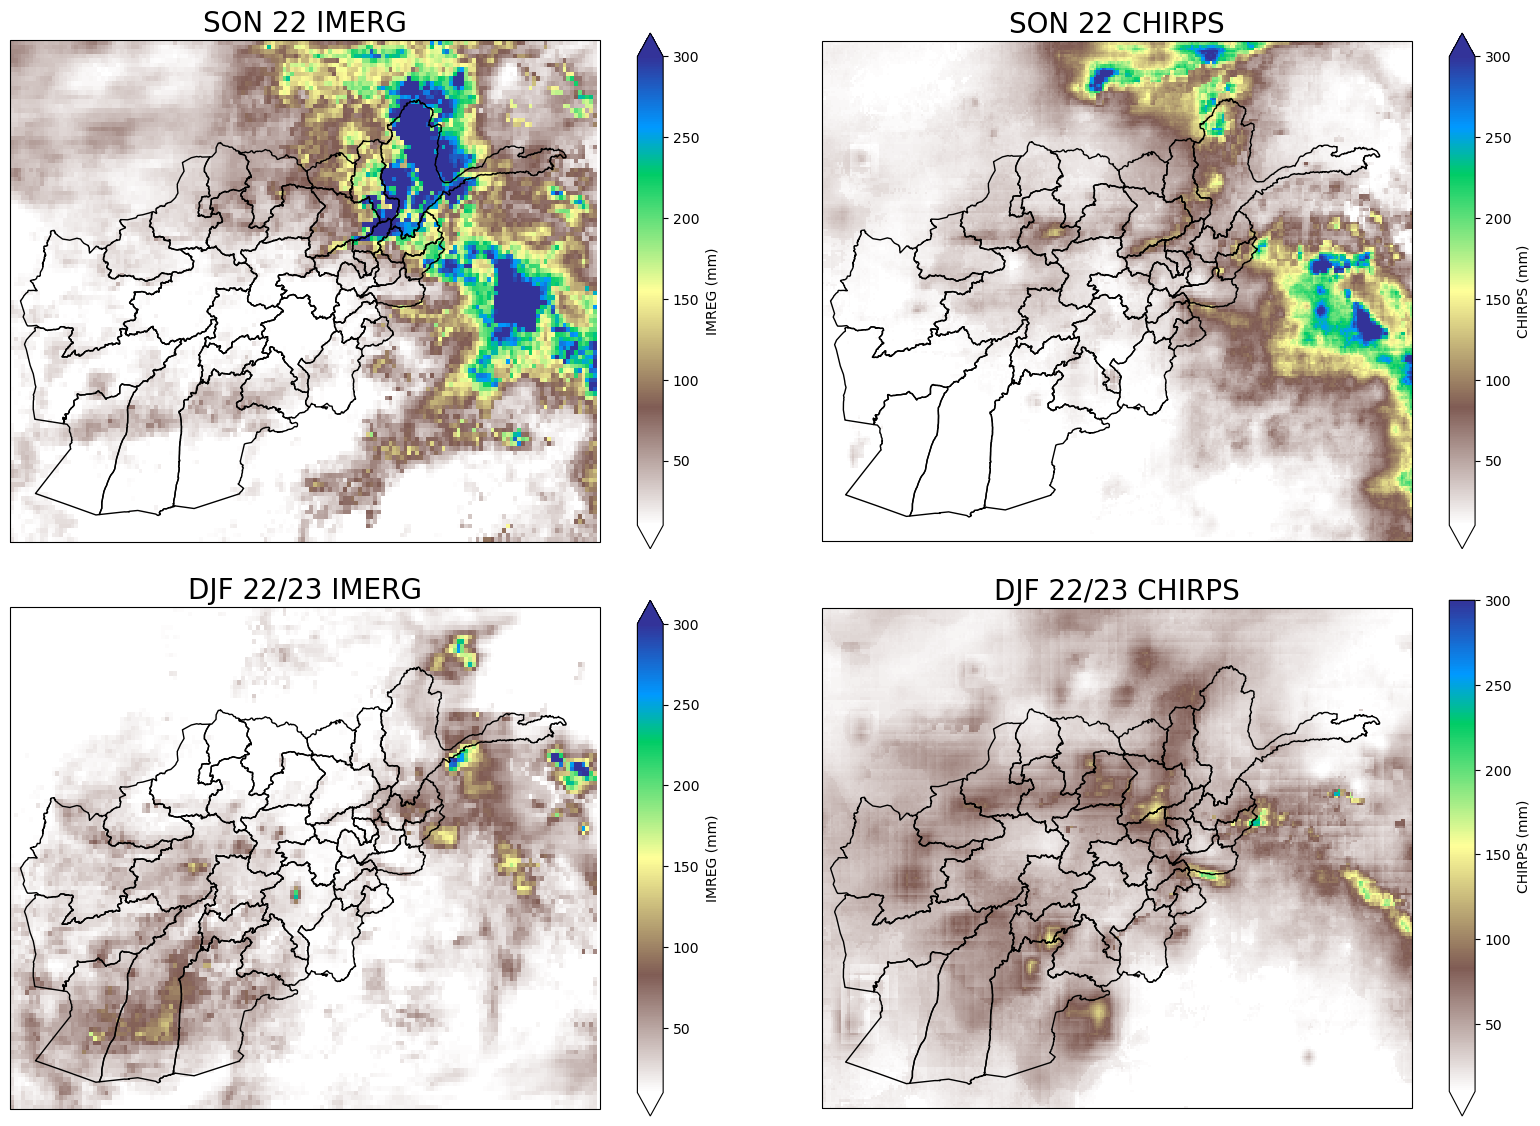

In [54]:
nrows, ncols = 2, 2
figwidth = 20; height = nrows * (LAT_MAX - LAT_MIN); width = ncols * (LON_MAX - LON_MIN)
figheight = (figwidth/width)*height

fig = plt.figure(figsize=(figwidth, figheight))
gs = gridspec.GridSpec(nrows, ncols, wspace=0.1, hspace=0.1)
COUNT_PLOT = 0

ax = fig.add_subplot(gs[COUNT_PLOT], projection=ccrs.PlateCarree())
COUNT_PLOT+=1
SEL_IMERG.resample(time='Q-Feb').sum(dim='time').sel(time='2022-11-30')['precipitation_amount'].plot(cmap='terrain_r', vmin=10, vmax=300, cbar_kwargs={"label": "IMREG (mm)"})
plt.title('SON 22 IMERG', fontsize=20)
ADMIN_shp.boundary.plot(ax=ax, color='k', lw=1)

ax = fig.add_subplot(gs[COUNT_PLOT], projection=ccrs.PlateCarree())
COUNT_PLOT+=1
SEL_CHIRPS.resample(time='Q-Feb').sum(dim='time').sel(time='2022-11-30')['precip'].plot(cmap='terrain_r', vmin=10, vmax=300, cbar_kwargs={"label": "CHIRPS (mm)"})
plt.title('SON 22 CHIRPS', fontsize=20)
ADMIN_shp.boundary.plot(ax=ax, color='k', lw=1)


ax = fig.add_subplot(gs[COUNT_PLOT], projection=ccrs.PlateCarree())
COUNT_PLOT+=1
SEL_IMERG.resample(time='Q-Feb').sum(dim='time').sel(time='2023-02-28')['precipitation_amount'].plot(cmap='terrain_r', vmin=10, vmax=300, cbar_kwargs={"label": "IMREG (mm)"})
plt.title('DJF 22/23 IMERG', fontsize=20)
ADMIN_shp.boundary.plot(ax=ax, color='k', lw=1)

ax = fig.add_subplot(gs[COUNT_PLOT], projection=ccrs.PlateCarree())
COUNT_PLOT+=1
SEL_CHIRPS.resample(time='Q-Feb').sum(dim='time').sel(time='2023-02-28')['precip'].plot(cmap='terrain_r', vmin=10, vmax=300, cbar_kwargs={"label": "CHIRPS (mm)"})
plt.title('DJF 22/23 CHIRPS', fontsize=20)
ADMIN_shp.boundary.plot(ax=ax, color='k', lw=1)
Figure = '{}/plot_IMERG_vs_CHIRPS_Winter_season_22-23.png'.format(PLOTDIR)
print (Figure)
plt.savefig(Figure, dpi=150, format='png', bbox_inches='tight')